In [ ]:
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
from matplotlib import colormaps as cm
import tarfile
from google.colab import files
from sklearn.model_selection import train_test_split



pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

plt.rc('font', size=8)
plt.rc('axes', labelsize=8, titlesize=14)
plt.rc('legend', fontsize=10)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)



#Download Data

In [ ]:
def load_data():
    tarball_path = Path("datasets/googleplaystore.csv")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        files.upload()
        ! mkdir ~/.kaggle
        ! cp kaggle.json ~/.kaggle/
        ! chmod 600 ~/.kaggle/kaggle.json
        !kaggle datasets download -d lava18/google-play-store-apps
        !unzip google-play-store-apps.zip -d datasets
        
    return pd.read_csv(Path("datasets/googleplaystore.csv"))

appdata = load_data()

# Quick Look at data

In [ ]:
appdata.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
appdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
from IPython.display import display

cols=["Category","Rating","Installs","Type","Content Rating","Genres","Current Ver","Android Ver"]
for col in cols:
  display(pd.DataFrame(appdata[col].value_counts()).T)
  print("\n"+"_"*150)

,FAMILY,GAME,TOOLS,MEDICAL,BUSINESS,PRODUCTIVITY,PERSONALIZATION,COMMUNICATION,SPORTS,LIFESTYLE,FINANCE,HEALTH_AND_FITNESS,PHOTOGRAPHY,SOCIAL,NEWS_AND_MAGAZINES,SHOPPING,TRAVEL_AND_LOCAL,DATING,BOOKS_AND_REFERENCE,VIDEO_PLAYERS,EDUCATION,ENTERTAINMENT,MAPS_AND_NAVIGATION,FOOD_AND_DRINK,HOUSE_AND_HOME,LIBRARIES_AND_DEMO,AUTO_AND_VEHICLES,WEATHER,ART_AND_DESIGN,EVENTS,PARENTING,COMICS,BEAUTY,1.9
Category,1972,1144,843,463,460,424,392,387,384,382,366,341,335,295,283,260,258,234,231,175,156,149,137,127,88,85,85,82,65,64,60,60,53,1



______________________________________________________________________________________________________________________________________________________


,4.4,4.3,4.5,4.2,4.6,4.1,4.0,4.7,3.9,3.8,5.0,3.7,4.8,3.6,3.5,3.4,3.3,4.9,3.0,3.1,3.2,2.9,2.8,2.7,2.6,2.5,2.3,2.4,1.0,2.2,1.9,2.0,1.7,1.8,2.1,1.6,1.4,1.5,1.2,19.0
Rating,1109,1076,1038,952,823,708,568,499,386,303,274,239,234,174,163,128,102,87,83,69,64,45,42,25,25,21,20,19,16,14,13,12,8,8,8,4,3,3,1,1



______________________________________________________________________________________________________________________________________________________


,"1,000,000+","10,000,000+","100,000+","10,000+","1,000+","5,000,000+",100+,"500,000+","50,000+","5,000+","100,000,000+",10+,500+,"50,000,000+",50+,5+,"500,000,000+",1+,"1,000,000,000+",0+,0,Free
Installs,1579,1252,1169,1054,907,752,719,539,479,477,409,386,330,289,205,82,72,67,58,14,1,1



______________________________________________________________________________________________________________________________________________________


,Free,Paid,0
Type,10039,800,1



______________________________________________________________________________________________________________________________________________________


,Everyone,Teen,Mature 17+,Everyone 10+,Adults only 18+,Unrated
Content Rating,8714,1208,499,414,3,2



______________________________________________________________________________________________________________________________________________________


,Tools,Entertainment,Education,Medical,Business,Productivity,Sports,Personalization,Communication,Lifestyle,Finance,Action,Health & Fitness,Photography,Social,News & Magazines,Shopping,Travel & Local,Dating,Books & Reference,Arcade,Simulation,Casual,Video Players & Editors,Puzzle,Maps & Navigation,Food & Drink,Role Playing,Strategy,Racing,House & Home,Libraries & Demo,Auto & Vehicles,Weather,Adventure,Events,Comics,Art & Design,Beauty,Education;Education,Card,Parenting,Board,Educational;Education,Casino,Trivia,Educational,Casual;Pretend Play,Word,Entertainment;Music & Video,Education;Pretend Play,Music,Casual;Action & Adventure,Racing;Action & Adventure,Puzzle;Brain Games,Educational;Pretend Play,Action;Action & Adventure,Arcade;Action & Adventure,Board;Brain Games,Casual;Brain Games,Adventure;Action & Adventure,Simulation;Action & Adventure,Entertainment;Brain Games,Parenting;Education,Role Playing;Action & Adventure,Casual;Creativity,Art & Design;Creativity,Education;Creativity,Education;Action & Adventure,Educational;Brain Games,Parenting;Music & Video,Education;Music & Video,Puzzle;Action & Adventure,Educational;Creativity,Role Playing;Pretend Play,Education;Brain Games,Educational;Action & Adventure,Sports;Action & Adventure,Simulation;Pretend Play,Casual;Education,Music;Music & Video,Board;Action & Adventure,Video Players & Editors;Music & Video,Entertainment;Action & Adventure,Simulation;Education,Entertainment;Creativity,Art & Design;Action & Adventure,Books & Reference;Education,Card;Action & Adventure,Adventure;Education,Video Players & Editors;Creativity,Entertainment;Pretend Play,Casual;Music & Video,Puzzle;Creativity,Art & Design;Pretend Play,Strategy;Action & Adventure,"February 11, 2018",Strategy;Education,Trivia;Education,Communication;Creativity,Role Playing;Brain Games,Racing;Pretend Play,Role Playing;Education,Puzzle;Education,Adventure;Brain Games,Books & Reference;Creativity,Lifestyle;Education,Entertainment;Education,Health & Fitness;Action & Adventure,Parenting;Brain Games,Tools;Education,Travel & Local;Action & Adventure,Board;Pretend Play,Health & Fitness;Education,Music & Audio;Music & Video,Arcade;Pretend Play,Card;Brain Games,Lifestyle;Pretend Play,Comics;Creativity,Strategy;Creativity
Genres,842,623,549,463,460,424,398,392,387,381,366,365,341,335,295,283,260,257,234,231,220,200,193,173,140,137,127,109,107,98,88,85,85,82,75,64,59,58,53,50,48,46,44,41,39,38,37,31,29,27,23,22,21,20,19,19,17,16,15,13,13,11,8,7,7,7,7,7,6,6,6,5,5,5,5,5,4,4,4,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1



______________________________________________________________________________________________________________________________________________________


,Varies with device,1.0,1.1,1.2,2.0,1.3,1.0.0,1.0.1,1.4,1.5,1.0.2,1.6,1.0.3,2.1,3.0,1.0.4,1.7,2.0.0,1.0.5,1.1.0,1.1.1,1.0.6,1.2.1,1.2.0,1.8,4.0,1.9,2.3.2,2.4,1.0.7,1.0.9,2.2,1.1.2,2.0.1,5.0,3.1,1.4.0,2.5,1.1.3,3.0.0,1.0.8,2.3,1.3.0,1,1.2.2,4.1,1.1.4,5.1,2.1.1,1.2.3,8.2,3.3,2.6,6.0,1.3.1,2.1.0,3.1.0,1.5.0,1.01,1.1.6,4.2.2,2.4.0,2.0.5,1.6.1,3.0.1,2.9,2.1.2,1.1.5,2.7,2.5.1,1.5.1,3.2,2.4.1,0.0.1,3.1.4,2.0.7,1.03,2.8,3.8.0,2,1.1.7,1.6.2,1.5.2,5.2,1.11,1.2.6,1.0.11,3.5,0.1,1.2.7,8.0,4.1.0,3.0.2,2.1.3,1.3.3,3.1.1,1.10,1.2.9,2.2.1,2.3.1,3.6.1,2.0.4,3.0.5,2.0.3,1.02,5.9.1.0,4.2.1,2.1.4,2.0.2,1.1.8,7.0,1.3.2,1.6.0,4.5.2,1.8.1,1.2.5,2.2.0,1.17,3.2.0,4.17.2,1.7.2,3.4,2.2.2,1.8.2,1.0.10,1.3.4,1.2.4,3.6,11.45.0,4.1.1,2.9.0,1.7.0,5.3,1.4.1,1.4.6,1.05,3.9,1.7.1,1.8.0,300000.1.11,6.1,1.6.7.1,4.2,2.3.0,3.4.5,4.4.1,3.1.2,5.0.0,3.7,2.1.5,3.8,1.8.19106,4.0.0,1.4.4,1.7.3,3.0.6,2.347.225742,3.2.1,1.12,2.4.4,1.3.6,18.7.1,1.3.5,4.0.2,2.0.8,2.4.2,1.06,1.08,9.0,1.07,4.4,4.7.0,1.0.16,1.4.2,2.8.0,1.24,2.6.0,6.1.7,3.1.3,1.14,1.8.3,3.4.0,3.2.5,6.1.3,3.0.4,4.2.0,4.3,2.5.0,Android 3.0 - 2015,1.129.0.2,8.1,2.3.5,1.04,4.0.1,1.1.9,6.0.0,3.5.0,1.9.7,1.9.1,3.3.0,1.7.7,1.18,2.3.3,2.17,2.12.5,5.0.1,1.0.27,1.6.5,1.49.1,4.1.2,5.4,4.6.0,2.1.8,2.5.2,3,2.3.4,1.3.7,1.4.3,1.20,6.0.1,1.90.0,3.9.2,6.2.0,2.2.7,1.6.3,18.1.79,2.2.4,1.0.12,2.6.1,3.4.4,3.1.9,1.28,2.2.5,7.6.5,4.2.3,7.2,4.0.5,4.3.0,6.5.1,1.6.4,3.0.3,1.11.0,5.3.0,4.6.2,4.0.3,2.8.2,8.25.10.00,4.5.1,5.13.1,7,10,3.8.8,5.0.4,5.33.3669,1.13,16.0.10325.20043,1.4.9,0.0.9,2.2.8,2.9.1,2.0.9,7.5.0,1.0.15,2.10,4.7,1.31,3.7.1,2.2.9,3.52,7.4,1.9.0,7.0.1,20.7.2,3.5.3,1.00,4.0.4,1.0.21,14.0,4.6,3.2.7,1.0.0.0,5.2.1,6.9.031,4.4.4,5.3.1,1.32,4.5,6.17.2,1.40,1.5.4,1.21.0,2.7.0,5.1.1,4.20.5,7.9.3,1.4.0.1,2.2.3,1.2.8,5.48,7.2.2,2.2.00,6.7.0,Cow V3.15,5.2.2,7.8.0,0.0.2,0.8,5.1.0,300000.0.97,6.5.3,1.4.5,1.22,1.95,"1,01",4.10.0,2.17.0,3.0.10,4.3.6,2.70.206190089,1.0.23,3.3.6,4,1.26,2.18,12,3.1.6z,1.0.19,5.14.0,2.14,5.5,6.5,2.1.10,1.37.2,5.1.8,3.7.2.51,1.0.47,2.8.2.59,2.10.2,4.7.4,2.1.9,0.7.0,7.2.1,1.9.3,3.6.0,2.25.17,3.10.26,4.4.3,1.8.4,4.0.9,6.6,4.4.7,8.0.226,6.2,1.17.0,6.4.0,9.1.4,5.13.007,2.6.3,7.1,6.7.5,10.0,7.2.5,3.2.2,5.7,1.6.7,5.2.0,3.1.7,4.1.4,3.2.4,2.5.9,4.4.2,18.0,1.283.0037,10.322.16,1.19,5.1.2,4.0.6,9.7.753080,1.5.3,2.2.6,3.1.8,6.7.1,1.20.1,18.30.0,1.4.77,2.6.9,3.3.1,1.39,3.5.2,4.3.2,1.3.8,3.0.7,9.8.000000010501,2.9.8,2.6.2,3.9.1,6.1.2,4.5.4,2.6.6,15.0,13.9.0.161,3.43.3,5.20.7,7.5.3.20547,1.16,3.4.2,1.31.3,1.10.0,4.20,1.15,3.4.6,1.12.0,11.10.1,5.064,3.5.0.1,2.0.6,20,1.38,6.2.73,11.0,1.9.2,6.1.0,5.0.16,6.7,4.3.0.508,4.5.0,6.3.3,2.7.6,3.48,1.37,14,3.2.3,6.0.3,1.7.14,1.35,5.5.2,v1.0,2.0.20,5.7.2,4.4.15,18.7,3.9.7,47.1.2249.129326,1.5.8,2.4.11,4.9.1,2.7.36,2.22,2.15.1,3.7.5,6.15.0,9.3.1,2.1.7,4.3.1,5.29.3,4.8.0,3.8.2,1.6.6,0.1.1,4.8.4,1.1.10,2.1.6,2.2.3181,3.9.3,2.7.8,3.8.75a,6.25.0+1906001476,5.3.4,4.7.3,1.118.4,1.4.8,5.0.6,4.7.1,3.2.6,1.0.28,4.2.4,5.1.4,16.14.0.100,1.23.3.0,7.5.9.1,11.0.0,2.16,3.8.1,2.12.0,1.29,2.4.3,4.8.0.132,3.7.2,4.47,6.3.1,3.1.5,1.43.3,5.9.0,2.20,1.751,1.,22.0,1.8.5,3196,5.0.8,1.53,4.8.5,2.0.10,43.0,1.22.0,0.0.4,4.5.5,4.4.9,5.6.8,5.66,3.13.09,2.21.5,6.3.7,18.10.157066,7.12,7.3(800241),1.17.2,3.10,3.3.2,2.8.4,1.7.5,3.9.4,4.6.4,4.21.1,2.7.2,6.19.5,4.9.10,8.18,1.0.13,1.11.2,2018.5.47,4.8.1,1.10.1,1.21.2,2.19.0.204537701,2.7.4,1.33,0.99,20.0,11.4.0,4.9,1.51,5.7.0,5.7.1,1.57,2.4.9,1.73,1.3.9,1.21,6,7.3,1.2.3-play,2.9.4,1.0.209,5.17,1.4.7,5,3.3.1.41,6.6.1,5.5.0,2.13.5,12.8.2,1.0.20,10.0.3086,37893,12.8.5.1121,4.1.8.2.2,1.4.12,16.0.10325.20024,2.3.9,1.8.6,1.14.0,0.0.7,3.6.2,6.0.2,1.48,4.1.3,1.25,6.0.4,6.8.2,4.4.5,6.02.000,2.12,1.52,1.50,2.9.5,3.19,6.2.3,1.54,0.0.5,1.7.6,2.28,1.23,4.38.176,2.25.0,0.2.7,3.19.34,3.52.1,1.16.0,2.1.35,1.0.02,1.278.0037,1.0.3386,5.11,8.8,3.27.3,1.47,1.8.19179,5.9.6,1.1.14,1.2.A.Exceed.Paid,0.1.100944346,2.11.0,42.0.0.2059,7.3.1,4.1.202,4.81,69.0.3497.24,2.1.20,3.1.7z,9.9.0,6.7.5222,1.28.01,13.0,2.1.18,2.4.12,3.2.0h,10.0.0,2.4.25,3.4.1,6.14.091,4.5.3,7.4.1,10.4.1.000_00,7.2.0,1.0.2.1,1.10.


______________________________________________________________________________________________________________________________________________________


,4.1 and up,4.0.3 and up,4.0 and up,Varies with device,4.4 and up,2.3 and up,5.0 and up,4.2 and up,2.3.3 and up,2.2 and up,4.3 and up,3.0 and up,2.1 and up,1.6 and up,6.0 and up,7.0 and up,3.2 and up,2.0 and up,5.1 and up,1.5 and up,4.4W and up,3.1 and up,2.0.1 and up,8.0 and up,7.1 and up,4.0.3 - 7.1.1,5.0 - 8.0,1.0 and up,7.0 - 7.1.1,4.1 - 7.1.1,5.0 - 6.0,2.2 - 7.1.1,5.0 - 7.1.1
Android Ver,2451,1501,1375,1362,980,652,601,394,281,244,243,241,134,116,60,42,36,32,24,20,12,10,7,6,3,2,2,2,1,1,1,1,1



______________________________________________________________________________________________________________________________________________________


In [ ]:
pd.DataFrame(appdata["Category"].value_counts()).T

,FAMILY,GAME,TOOLS,MEDICAL,BUSINESS,PRODUCTIVITY,PERSONALIZATION,COMMUNICATION,SPORTS,LIFESTYLE,FINANCE,HEALTH_AND_FITNESS,PHOTOGRAPHY,SOCIAL,NEWS_AND_MAGAZINES,SHOPPING,TRAVEL_AND_LOCAL,DATING,BOOKS_AND_REFERENCE,VIDEO_PLAYERS,EDUCATION,ENTERTAINMENT,MAPS_AND_NAVIGATION,FOOD_AND_DRINK,HOUSE_AND_HOME,LIBRARIES_AND_DEMO,AUTO_AND_VEHICLES,WEATHER,ART_AND_DESIGN,EVENTS,PARENTING,COMICS,BEAUTY,1.9
Category,1972,1144,843,463,460,424,392,387,384,382,366,341,335,295,283,260,258,234,231,175,156,149,137,127,88,85,85,82,65,64,60,60,53,1


In [ ]:
t_df=appdata["Type"].value_counts()
pd.DataFrame(t_df).T

,Free,Paid,0
Type,10039,800,1


In [ ]:
t_df=appdata["Content Rating"].value_counts()
pd.DataFrame(t_df).T

,Everyone,Teen,Mature 17+,Everyone 10+,Adults only 18+,Unrated
Content Rating,8714,1208,499,414,3,2


In [ ]:
t_df=appdata["Content Rating"].value_counts()
pd.DataFrame(t_df).T

,Everyone,Teen,Mature 17+,Everyone 10+,Adults only 18+,Unrated
Content Rating,8714,1208,499,414,3,2


In [ ]:
def nullcount(df):
  vals={}
  for col in df.columns:
    vals[col]=df[col].isnull().sum()

  return vals

nullcount(appdata)

{'App': 0,
 'Category': 0,
 'Rating': 1474,
 'Reviews': 0,
 'Size': 0,
 'Installs': 0,
 'Type': 1,
 'Price': 0,
 'Content Rating': 1,
 'Genres': 0,
 'Last Updated': 0,
 'Current Ver': 8,
 'Android Ver': 3}

In [ ]:
# save charts
IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
appdata.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#Clean Data

#Create a Test Set

In [ ]:

appdata = appdata.dropna()

In [ ]:
appdata["rating_cat"]=pd.cut(appdata["Rating"],
                               bins=[-np.inf,1.0, 2.0, 3.0, 4.0, np.inf],
                               labels=[1,2, 3, 4, 5])

<ipython-input-697-24960dc3b8b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appdata["rating_cat"]=pd.cut(appdata["Rating"],


In [ ]:
# appdata["rating_cat"].value_counts().sort_index().plot(rot=0, kind='bar', grid=True)
# plt.xlabel("Rating category")
# plt.ylabel("Number of Apps")
# #save_fig("housing_income_cat_bar_plot")  # extra code
# plt.show()

In [ ]:
nullcount(appdata)["rating_cat"]<=0

True

In [ ]:

strat_train_set, strat_test_set = train_test_split(
    appdata_option1, test_size=0.2, stratify=appdata_option1["rating_cat"], random_state=42)

#Discover and Visualize the Data to Gain Insights

Text(0.5, 1.0, 'Boxplot of Rating VS Category')

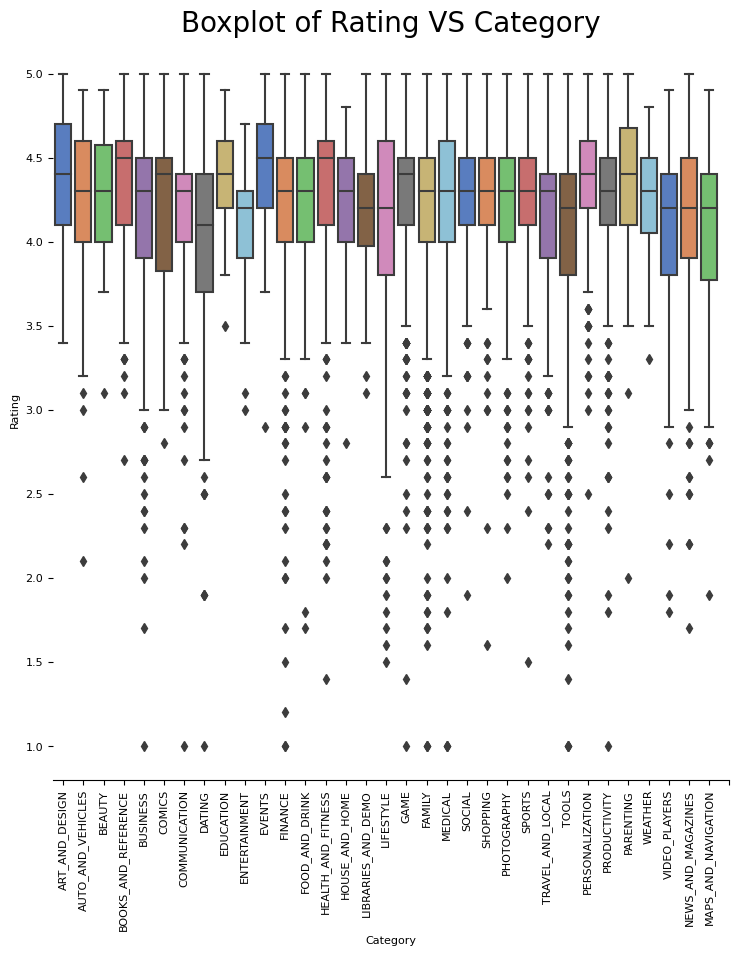

In [ ]:

fig = sns.catplot(x="Category",y="Rating",data=appdata, kind="box", height = 8 ,
palette = "muted")
fig.despine(left=True)
fig.set_xticklabels(rotation=90)
fig.set( xticks=range(0,34))
fig = fig.set_ylabels("Rating")
plt.title('Boxplot of Rating VS Category',size = 20)

In [ ]:
#outlier in rating
appdata["Rating"]=appdata["Rating"].apply(lambda x: x/10 if x>10 else x)


Text(0.5, 1.0, 'Boxplot of Rating VS Category')

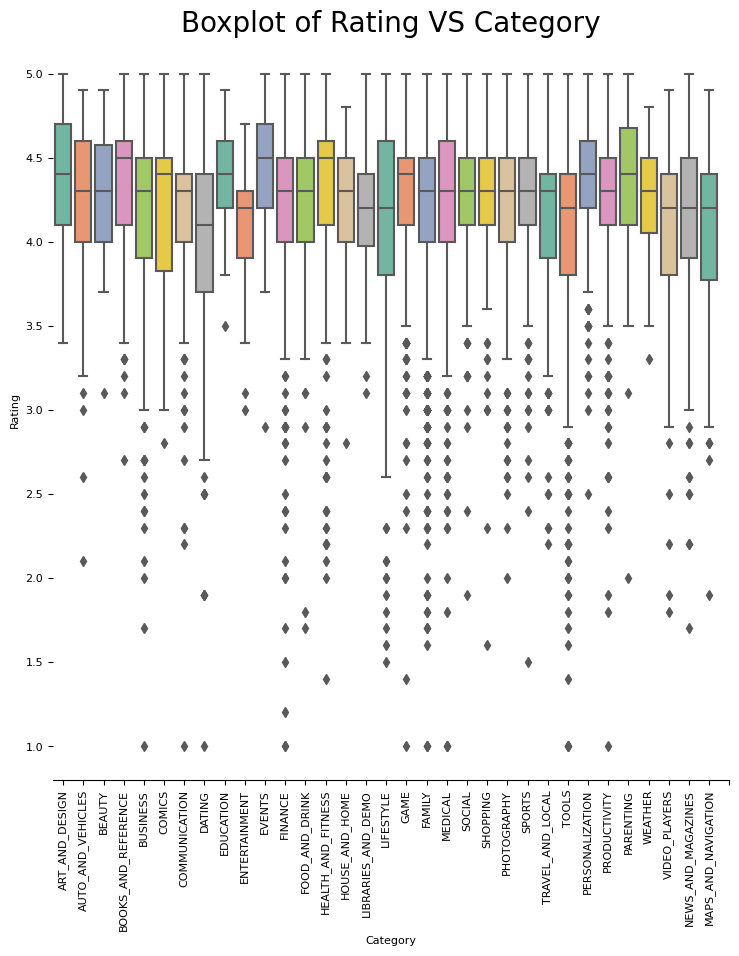

In [ ]:

fig = sns.catplot(x="Category",y="Rating",data=appdata, kind="box", height = 8 ,
palette = "Set2")
fig.despine(left=True)
fig.set_xticklabels(rotation=90)
fig.set( xticks=range(0,34))
fig = fig.set_ylabels("Rating")
plt.title('Boxplot of Rating VS Category',size = 20)

Text(0.5, 1.0, 'Distribution of Rating')

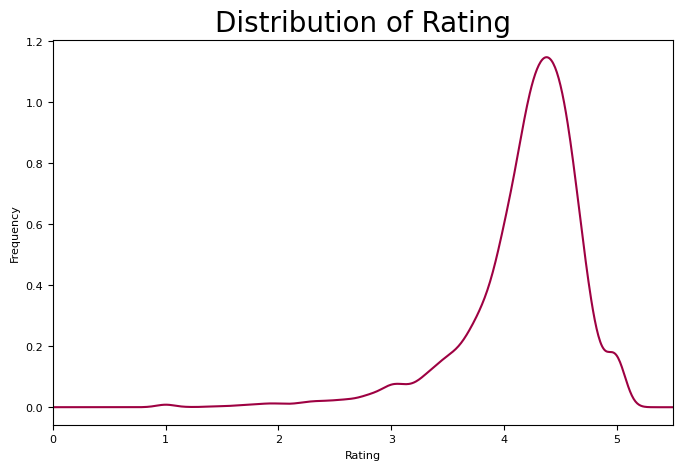

In [ ]:
import seaborn as sns
from pylab import rcParams


# rating distibution
cmap = cm.get_cmap('Spectral')

fig=appdata["Rating"].plot( kind='kde',figsize=(8,5), colormap=cmap, xlim=(0,5.5))
fig.set_xlabel("Rating")
fig.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

Text(0, 0.5, 'Frequency')

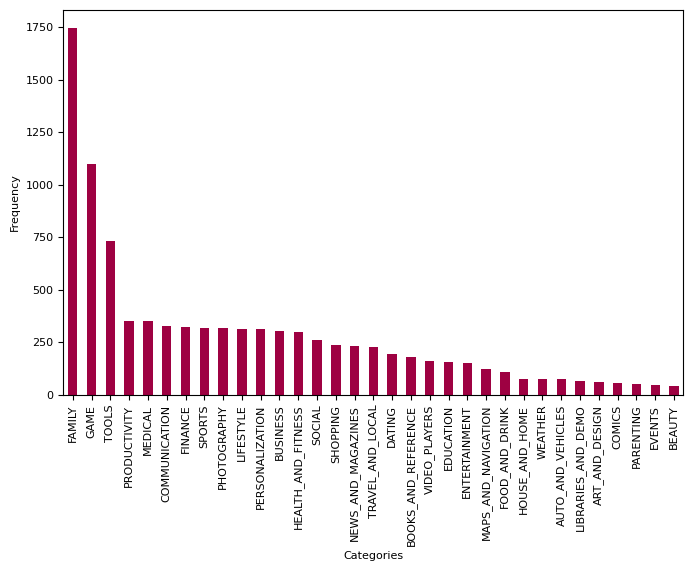

In [ ]:
#barchart for category

cat_=appdata["Category"].value_counts()
fig=cat_.plot( kind='bar',figsize=(8,5), legend=False, colormap=cmap)
fig.set_xlabel("Categories")
fig.set_ylabel("Frequency")

In [ ]:
len(appdata["Type"].value_counts())

2

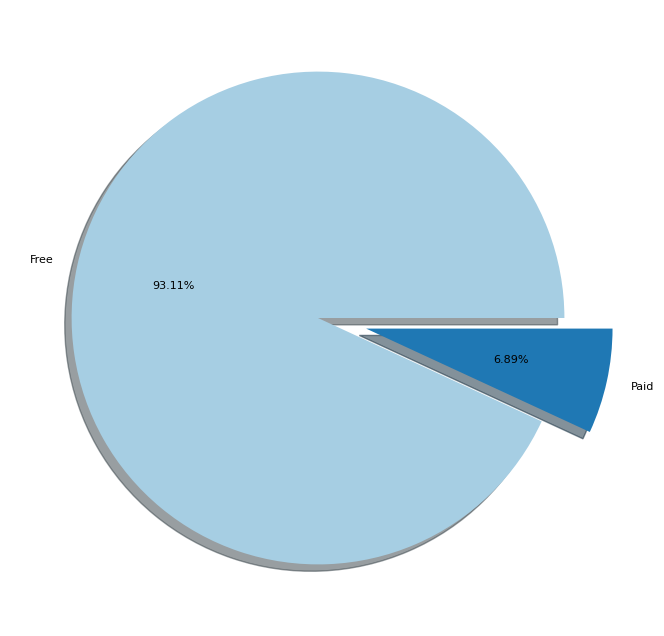

In [ ]:



#define Seaborn color palette to use
y = appdata["Type"].value_counts()
label = appdata["Type"].unique()

colors = sns.color_palette('Paired')[0:3]
explode=[i/5 for i in range(len(appdata["Type"].value_counts()))]

#create pie chart
plt.pie(y, labels = label, colors = colors, autopct='%.02f%%', shadow=True, explode=explode)
plt.show()

In [ ]:
print(filter(lambda v: v==v, label))

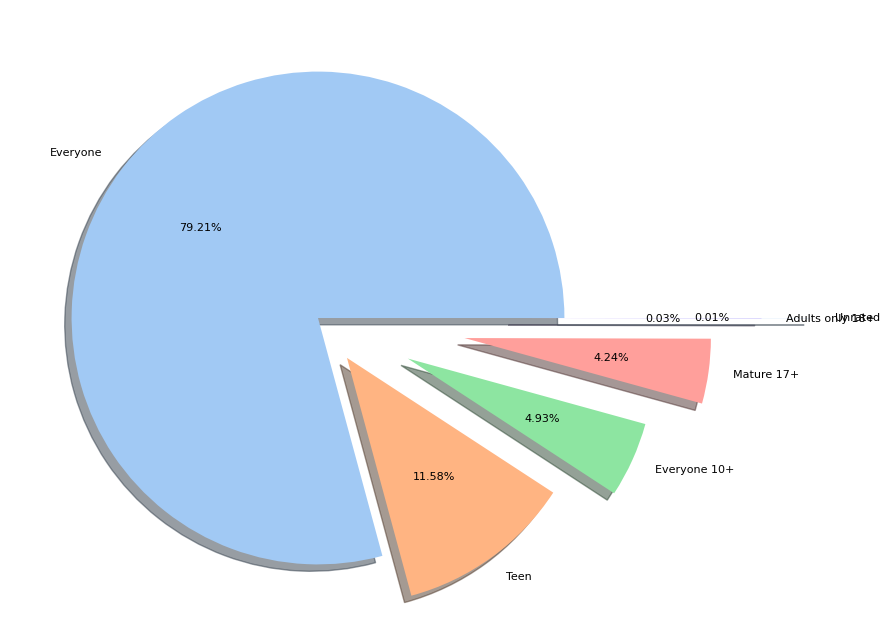

In [ ]:

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
y = appdata["Content Rating"].value_counts()
label = appdata["Content Rating"].dropna().unique()

explode=[i/5 for i in range(len(appdata["Content Rating"].value_counts()))]

#create pie chart
plt.pie(y, labels = label, colors = colors, autopct='%.02f%%', shadow=True, explode=explode)
plt.show()


#Cleaning Data

In [ ]:
appdata["Installs"]=appdata["Installs"].apply(lambda x: int(x.split("+")[0].replace(",","")) if x!="Free" else 0)

In [ ]:
appdata["Size"].replace('Varies with device', np.nan, inplace = True ) 
appdata["Size"] = (appdata["Size"].replace(r'[kM]+$', '', regex=True).astype(float) * \
             appdata["Size"].str.extract(r'[\d\.]+([KM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))

appdata['Size'].fillna(appdata.groupby('Category')['Size'].transform('mean'),inplace = True)

In [ ]:
appdata["Reviews"] = appdata["Reviews"].apply(lambda x: int(x))

In [ ]:
appdata["Price"] = appdata["Price"].apply(lambda x: float(x.replace("$","")) if x!="Free" else 0)

In [ ]:
appdata["Last Updated"] = pd.to_datetime(appdata["Last Updated"])

In [ ]:

appdata["Genres"] = appdata["Genres"].apply(lambda x: x.split(";")[0]) 
appdata["Genres_2"] = appdata["Genres"].apply(lambda x: x.split(";")[-1]) 

In [ ]:
appdata.drop(['App','Last Updated','Current Ver','Android Ver'],axis=1,inplace=True)

In [ ]:
appdata.dtypes

Category            object
Rating             float64
Reviews              int64
Size               float64
Installs             int64
Type                object
Price              float64
Content Rating      object
Genres              object
rating_cat        category
Genres_2            object
dtype: object

In [ ]:
appdata.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,rating_cat,Genres_2
0,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,5,Art & Design
1,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design,4,Art & Design
2,ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,5,Art & Design
3,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,5,Art & Design
4,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design,5,Art & Design


<ipython-input-719-159fb3738ec9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap( appdata.corr(), annot=True, cmap='Reds')


<Axes: >

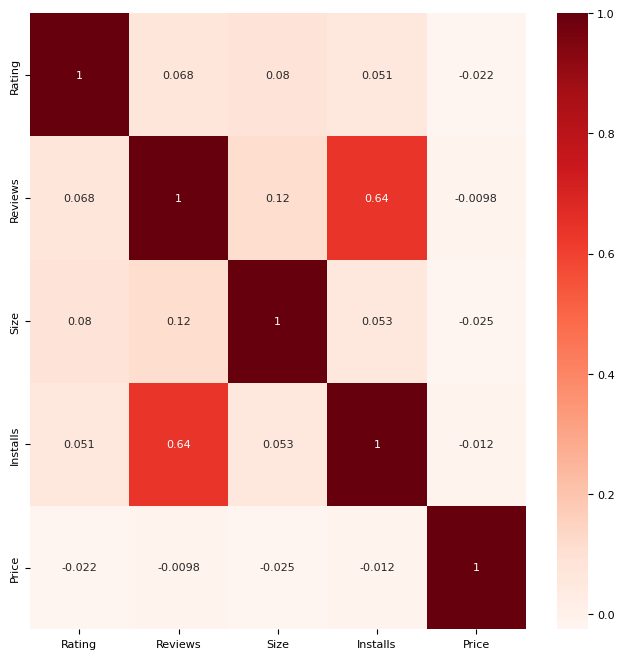

In [ ]:
 sns.heatmap( appdata.corr(), annot=True, cmap='Reds')

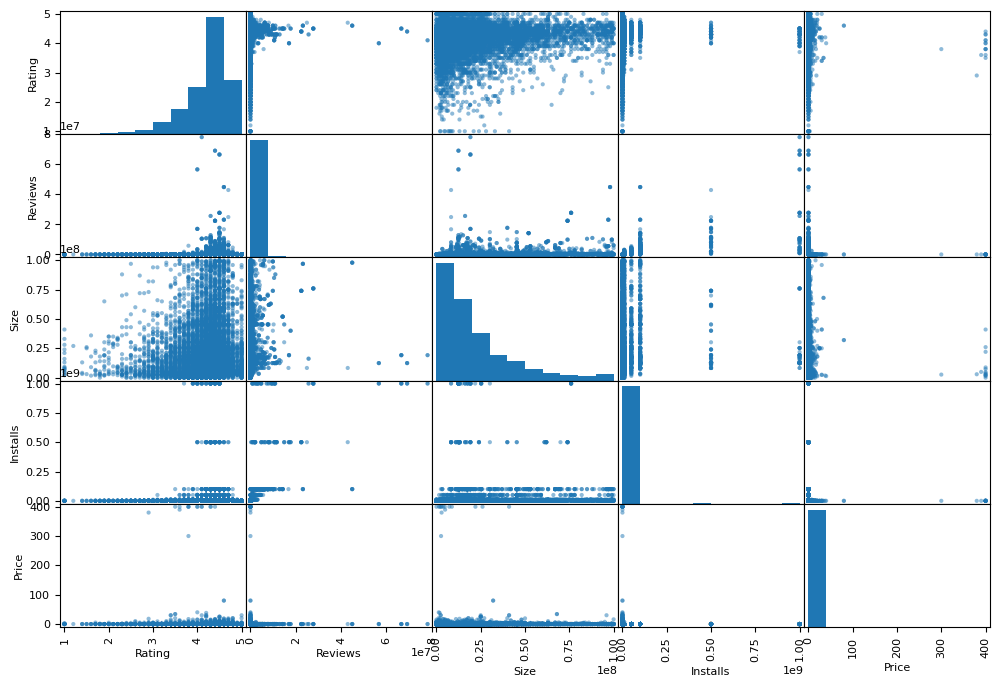

In [ ]:
from pandas.plotting import scatter_matrix


scatter_matrix(appdata, figsize=(12, 8))
# save_fig("scatter_matrix_plot")  # extra code
plt.show()

#Feature Engg

In [ ]:
appdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Category        9360 non-null   object  
 1   Rating          9360 non-null   float64 
 2   Reviews         9360 non-null   int64   
 3   Size            9360 non-null   float64 
 4   Installs        9360 non-null   int64   
 5   Type            9360 non-null   object  
 6   Price           9360 non-null   float64 
 7   Content Rating  9360 non-null   object  
 8   Genres          9360 non-null   object  
 9   rating_cat      9360 non-null   category
 10  Genres_2        9360 non-null   object  
dtypes: category(1), float64(3), int64(2), object(5)
memory usage: 813.7+ KB


<ipython-input-723-a7a11b334340>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap( appdata.corr(), annot=True, cmap='Reds')


<Axes: >

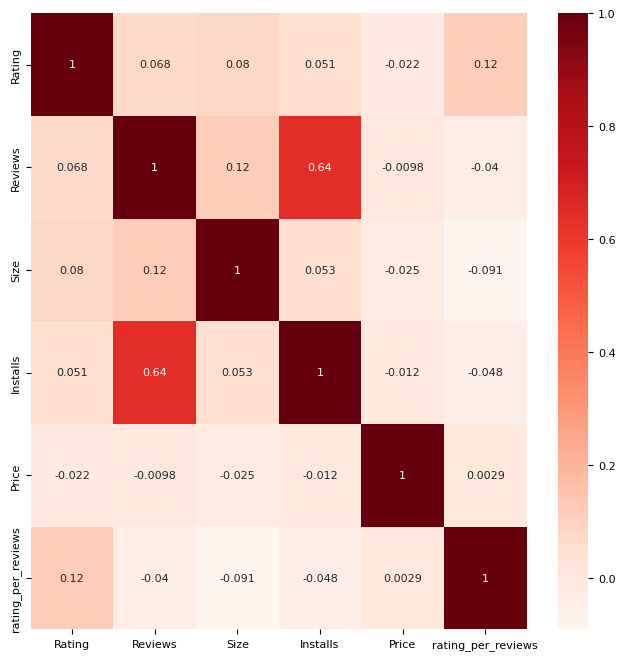

In [ ]:

# appdata["rating_per_price"] = appdata["Rating"] / appdata["Price"]
appdata["rating_per_reviews"] = appdata["Rating"] / appdata["Reviews"]


sns.heatmap( appdata.corr(), annot=True, cmap='Reds')

In [ ]:
nullcount(appdata)

{'Category': 0,
 'Rating': 0,
 'Reviews': 0,
 'Size': 0,
 'Installs': 0,
 'Type': 0,
 'Price': 0,
 'Content Rating': 0,
 'Genres': 0,
 'rating_cat': 0,
 'Genres_2': 0,
 'rating_per_reviews': 0}

#Handling Text and Categorical Attributes

In [ ]:
app_cat = appdata[["Category","Type", "Content Rating","Genres","Genres_2" ]]


,Category,Type,Content Rating,Genres,Genres_2
0,ART_AND_DESIGN,Free,Everyone,Art & Design,Art & Design
1,ART_AND_DESIGN,Free,Everyone,Art & Design,Art & Design
2,ART_AND_DESIGN,Free,Everyone,Art & Design,Art & Design
3,ART_AND_DESIGN,Free,Teen,Art & Design,Art & Design
4,ART_AND_DESIGN,Free,Everyone,Art & Design,Art & Design
5,ART_AND_DESIGN,Free,Everyone,Art & Design,Art & Design
6,ART_AND_DESIGN,Free,Everyone,Art & Design,Art & Design
7,ART_AND_DESIGN,Free,Everyone,Art & Design,Art & Design


In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
app_cat_1hot = cat_encoder.fit_transform(app_cat)

In [ ]:
cat_encoder.feature_names_in_

array(['Category', 'Type', 'Content Rating', 'Genres', 'Genres_2'],
      dtype=object)

In [ ]:
app_num = appdata.select_dtypes(include=[np.number])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
app_num_min_max_scaled = min_max_scaler.fit_transform(app_num)

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
app_num_std_scaled = std_scaler.fit_transform(app_num)

<ipython-input-754-f6e7c0610b57>:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

In [ ]:
appdata[appdata["Price"]==np.inf]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,rating_cat,Genres_2,rating_per_reviews


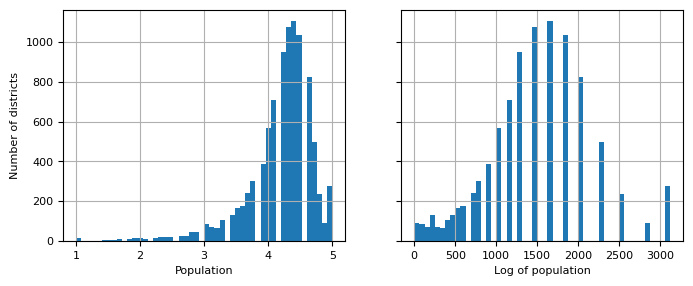

In [ ]:
# extra code – this cell generates Figure 2–17
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
appdata["Rating"].hist(ax=axs[0], bins=50)
appdata["Rating"].apply(lambda x: np.power(x,5)).hist(ax=axs[1], bins=5s0)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")
#save_fig("long_tail_plot")
plt.show()

In [ ]:
appdata.skew().sort_values(ascending=False)

<ipython-input-751-f7617d102dfa>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  appdata.skew().sort_values(ascending=False)


Price                 24.394446
Reviews               15.303031
Installs               8.885431
rating_per_reviews     7.484565
Size                   1.567370
Rating                -1.850135
dtype: float64

In [ ]:
appdata.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,rating_cat,Genres_2,rating_per_reviews
0,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,5,Art & Design,0.025786
1,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design,4,Art & Design,0.004033
2,ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,5,Art & Design,0.000054
3,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,5,Art & Design,0.000021
4,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design,5,Art & Design,0.004447
